In [3]:
import numpy as np
import apogee.tools.read as apread
from matplotlib import pyplot as plt
import pylab as pl
import csv

In [4]:
from apogee.tools import bitmask
from astropy.io import fits

### Test M-dwarf flag on one star

In [4]:
star1 = fits.open('/Volumes/coveydata-1/APOGEE_Spectra/APOGEE2_DR13/5011/apStar-r6-2M19150038+4423231.fits')
star1[0].header
bitmask.bit_set(19, -2147483136 )

False

In [5]:
star2 = fits.open('/Volumes/coveydata-1/APOGEE_Spectra/APOGEE2_DR13/4617/apStar-r6-2M06385414-0050001.fits')
star2[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2016-01-25'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
OBJID   = '2M06385414-0050001' / Object ID                                      
J       =              10.0270 / 2MASS J magnitude                              
H       =              10.0670 / 2MASS H magnitude                              
K       =              10.0170 / 2MASS Ks magnitude                             
TARG1   =          -2147483584 / First APOGEE targeting flag (bitwise, see docs)
TARG2   =          -21474831

In [6]:
bitmask.bits_set(bitmask.apogee_target1_int('APOGEE_MDWARF')) # = 19
#bitmask.bit_set(19, -939524096)
bitmask.bits_set(19)

[0, 1, 4]

### Opening allStar File 

In [5]:
allStar = apread.allStar(rmcommissioning=True,main=False,ak=True, akvers = 'targ', adddist=False)

In [6]:
mdwarf_indx = bitmask.bit_set(19,allStar['APOGEE_TARGET1'])
print(mdwarf_indx)

mdwarf_index = []
for z in range(len(mdwarf_indx)):
    b = mdwarf_indx[z]*1
    mdwarf_index.append(b)
#print(mdwarf_index)
from collections import Counter
Counter(mdwarf_index)
print(len(mdwarf_index))

[False False False ..., False False False]
155632


In [7]:
from collections import Counter
Counter(mdwarf_indx)

Counter({False: 154882, True: 750})

### With the found indicies of the M-dwarfs, find the corresponding location and apogee IDs

Perhaps, we can take the array of Boolean indicies and convert them to integer values that can be plugged back into the allStar file to obtain the location ID and apogee ID.

Additionally, we can extract other desired header data such as J, K, H (with their associated errors), signal-to-noise ratios, and magnitudes from WISE.


In [8]:
locationIDs = allStar['LOCATION_ID']
apogeeIDs = allStar['APOGEE_ID']
J_filter = allStar['J']
J_filterr = allStar['J_ERR']
H_filter = allStar['H']
H_filterr = allStar['H_ERR']
K_filter = allStar['K']
K_filterr = allStar['K_ERR']
SNRs = allStar['SNR']
WISE_4_5 = allStar['WISE_4_5']

In [40]:
location_IDs = []
apogee_IDs = []
J = []
J_err = []
H = []
H_err = []
K = []
K_err = []
SNR = []
wise = []


for i in range(len(mdwarf_index)):
    if mdwarf_index[i] == 1:
        l = locationIDs[i]
        a = apogeeIDs[i]
        j = J_filter[i]
        h = H_filter[i]
        k = K_filter[i]
        j_err = J_filterr[i]
        h_err = H_filterr[i]
        k_err = K_filterr[i]
        s = SNRs[i]
        w = WISE_4_5[i]
        location_IDs.append(l)
        apogee_IDs.append(a)
        J.append(j)
        H.append(h)
        K.append(k)
        J_err.append(j_err)
        H_err.append(h_err)
        K_err.append(k_err)
        SNR.append(s)
        wise.append(w)

In [51]:
print(len(J))

638


In [69]:
with open('Mdwarfs_DR13.csv','w') as csvfile:
    names = ['Location_ID','Apogee_ID','J','J_Err','H','H_Err','K','K_Err','WISE_4_5','SNR']
    writer = csv.DictWriter(csvfile,delimiter=',',fieldnames=names)
    writer.writeheader()
    for i in range(len(location_IDs)):
        writer.writerow({'Location_ID':location_IDs[i],'Apogee_ID':apogee_IDs[i],'J':J[i],'J_Err':J_err[i],'H':H[i], 'H_Err':H_err[i],'K':K[i],'K_Err':K_err[i],'WISE_4_5':wise[i],'SNR':SNR[i]})

### Construct Color-Color Diagrams for J-H vs. H-K

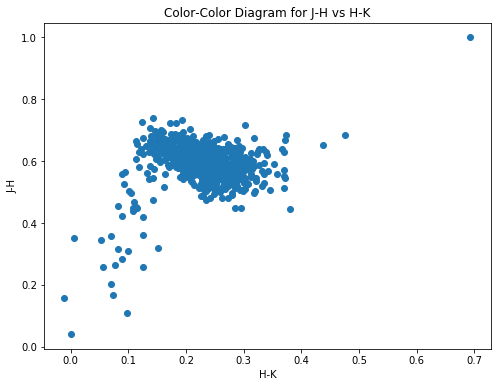

In [10]:
jh = []
hk = []

for y in range(len(J)):
    x = J[y] - H[y]
    z = H[y] - K[y]
    jh.append(x)
    hk.append(z)
plt.figure(figsize=(8,6))
plt.plot(hk,jh,"o")
plt.xlabel('H-K')
plt.ylabel('J-H')
plt.title('Color-Color Diagram for J-H vs H-K')
plt.savefig('CC_HK_vs_JH',dpi=1000)
plt.show()